<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 52.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 179.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 192.6 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=59c884e4adf8e2e6a3fb4d1628124450722ec171cf0c6aa488673b0ddc98e192
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=59e84cacfdcad3cb6155f35c10b651710b178b3a139fc4b089f6d7328cfa8d02
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
# Importar la librería
import yfinance as yf

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
# Extraer información bursátil histórica (máximo rango disponible)
tesla_data = tesla.history(period="max")

# Mostrar las primeras filas del DataFrame
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [12]:
# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [25]:
# Importar la librería requests
import requests

# URL de la página
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Descargar la página y guardar el contenido en html_data
response = requests.get(url)
html_data = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [17]:
# Importar la librería BeautifulSoup
from bs4 import BeautifulSoup

# Parsear los datos HTML con el parser 'html.parser'
soup = BeautifulSoup(html_data, "html.parser")

# Verificar mostrando el título de la página
print(soup.title)

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [21]:
# Paso 1: Crear un marco de datos vacío
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Paso 2: Encontrar la tabla relevante (la de ingresos trimestrales de Tesla)
tables = soup.find_all("table")  # encuentra todas las tablas
# inspeccionando, la primera tabla corresponde a Tesla
tesla_table = tables[0]

# Paso 3: Recorrer las filas del cuerpo de la tabla
for row in tesla_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:  # solo filas con 2 columnas válidas
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        # Paso 4: Agregar datos al marco de datos
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Fecha":[date], "Ingresos":[revenue]})], ignore_index=True)

# Paso 5: Mostrar las primeras filas del DataFrame
print(tesla_revenue.head())

  Date Revenue Fecha Ingresos
0  NaN     NaN  2021  $53,823
1  NaN     NaN  2020  $31,536
2  NaN     NaN  2019  $24,578
3  NaN     NaN  2018  $21,461
4  NaN     NaN  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 

In [26]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [27]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [30]:
# Mostrar las últimas 5 filas del DataFrame
print(tesla_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue, Fecha, Ingresos]
Index: []


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [42]:
# Crear el objeto Ticker para GameStop
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [36]:
# Extraer información bursátil histórica (máximo rango disponible)
gme_data = gme.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [37]:
# Restablecer el índice
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [43]:
# Importar la librería requests
import requests

# URL de la página
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Descargar la página y guardar el contenido en html_data_2
response = requests.get(url_gme)
html_data_2 = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [44]:
# Importar BeautifulSoup
from bs4 import BeautifulSoup

# Parsear el HTML con el parser 'html.parser'
soup2 = BeautifulSoup(html_data_2, "html.parser")

# Verificar mostrando el título de la página
print(soup2.title)

<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [49]:
# Paso 1: Crear un DataFrame vacío
gme_revenue = pd.DataFrame(columns=["Fecha", "Ingresos"])

# Paso 2: Encontrar todas las tablas en la página
tables = soup2.find_all("table")

# Paso 3: Seleccionar la tabla de ingresos de GameStop (en este caso suele ser la segunda tabla)
gme_table = tables[1]  

# Paso 4: Recorrer las filas del cuerpo de la tabla
for row in gme_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:  # solo filas con 2 columnas válidas
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        # Paso 5: Agregar datos al DataFrame
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Fecha":[date], "Ingresos":[revenue]})], ignore_index=True)

# Paso 6: Mostrar las primeras filas
print(gme_revenue.head())

# Limpiar la columna "Ingresos": eliminar comas y signo de dólar
gme_revenue["Ingresos"] = gme_revenue["Ingresos"].str.replace(',|\$',"", regex=True)

# Convertir la columna a valores numéricos
gme_revenue["Ingresos"] = pd.to_numeric(gme_revenue["Ingresos"], errors="coerce")

        Fecha Ingresos
0  2020-04-30   $1,021
1  2020-01-31   $2,194
2  2019-10-31   $1,439
3  2019-07-31   $1,286
4  2019-04-30   $1,548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [50]:
# Mostrar las últimas 5 filas del DataFrame
print(gme_revenue.tail())

         Fecha  Ingresos
57  2006-01-31      1667
58  2005-10-31       534
59  2005-07-31       416
60  2005-04-30       475
61  2005-01-31       709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


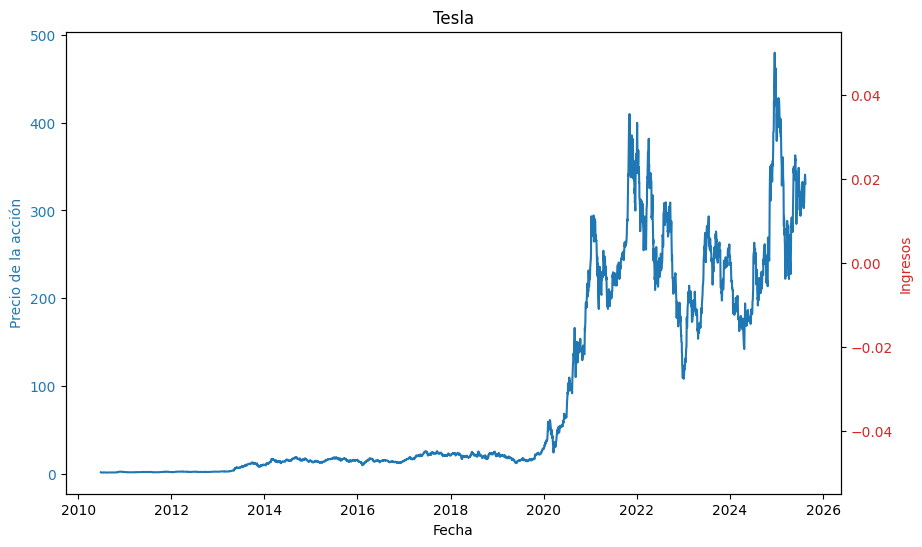

In [76]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(10,6))

    # Graficar precio de la acción
    ax1.plot(stock_data['Date'], stock_data['Close'], color="tab:blue")
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de la acción", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Graficar ingresos en el segundo eje
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color="tab:red")
    ax2.set_ylabel("Ingresos", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Título dinámico
    plt.title(title)
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


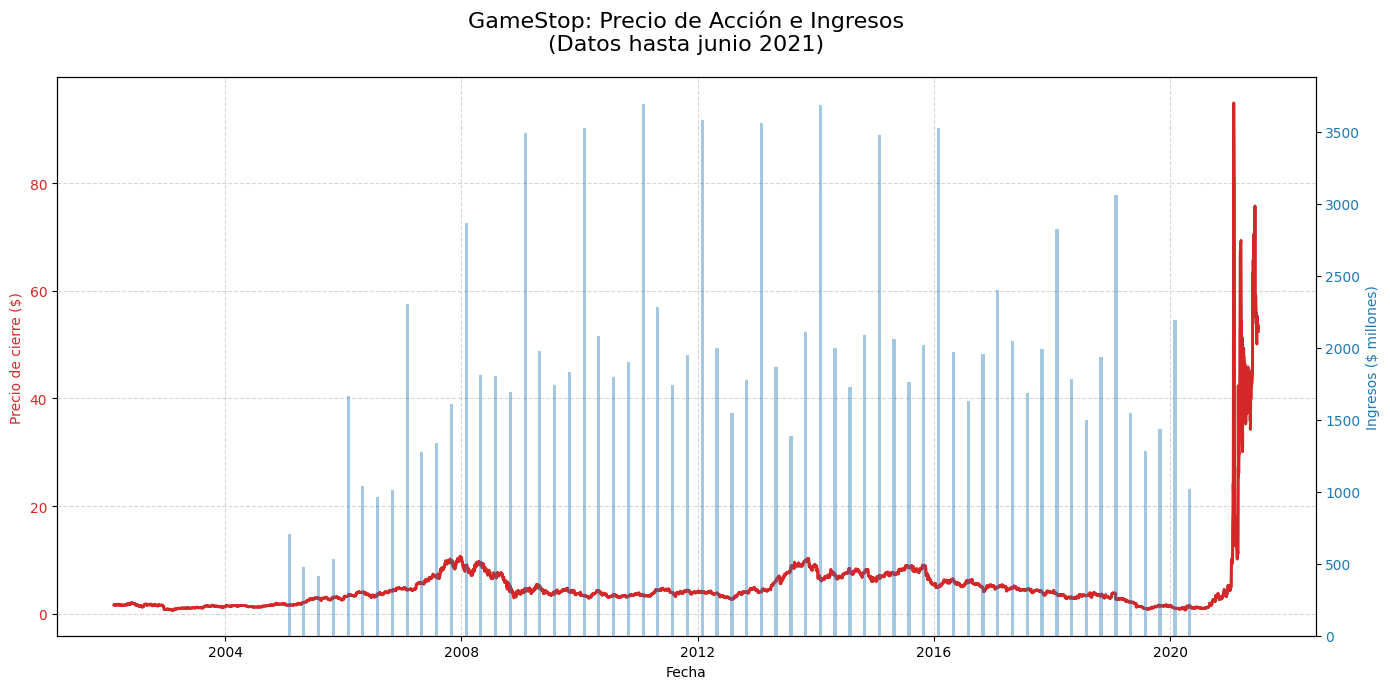

In [79]:
def make_graph(stock_data, revenue_data, title):
    """
    Función mejorada para graficar acciones e ingresos
    
    Parámetros:
    stock_data: DataFrame con columnas 'Date' y 'Close'
    revenue_data: DataFrame con columnas 'Date' y 'Revenue'
    title: Título del gráfico
    """
    # Verificar y estandarizar nombres de columnas
    stock_data = stock_data.rename(columns={
        stock_data.columns[0]: 'Date',
        stock_data.columns[1]: 'Close'  # Asume que la segunda columna es el precio de cierre
    })
    
    revenue_data = revenue_data.rename(columns={
        revenue_data.columns[0]: 'Date',
        revenue_data.columns[1]: 'Revenue'
    })
    
    # Convertir fechas y filtrar hasta junio 2021
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    # Crear figura con ejes secundarios
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Gráfico de precios (eje izquierdo)
    color = 'tab:red'  # Rojo para GameStop
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de cierre ($)', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color, linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.5)
    
    # Gráfico de ingresos (eje derecho)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Ingresos ($ millones)', color=color)
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color=color, alpha=0.4, width=20)
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Añadir título
    plt.title(title + '\n(Datos hasta junio 2021)', fontsize=16, pad=20)
    
    fig.tight_layout()
    plt.show()

# Llamar a la función
make_graph(gme_data, gme_revenue, 'GameStop: Precio de Acción e Ingresos')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
